In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [31]:
#1 напишіть функцію гіпотези лінійної регресії у векторному вигляді

def hypothesis_function(w, X):
  return np.dot(X,w)

In [32]:
#2 створіть функцію для обчислення функції втрат у векторному вигляді

def loss_function(X,y,w):
  m = X.shape[0]
  return np.square(hypothesis_function(w, X) - y).sum() / (2*m)

In [33]:
#3 реалізуйте один крок градієнтного спуску

def grad_step(w, X, y, learning_rate = 0.001):
    w = w - learning_rate*loss_function(X, y, w)
    return w

In [34]:
#4 знайдіть найкращі параметри wдля датасету прогнозуючу ціну на будинок залежно від площі, 
# кількості ванних кімнат та кількості спалень

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [77]:
X = np.array(df[["area", "bedrooms", "bathrooms"]])
y = np.array(df["price"])

regression = LinearRegression().fit(X, y)

print("Coefficients - sklearn: \n", regression.coef_)

Coefficients - sklearn: 
 [3.78762754e+02 4.06820034e+05 1.38604950e+06]


In [36]:
#5 знайдіть ці ж параметри за допомогою аналітичного рішення

X = np.array(df[["area", "bedrooms", "bathrooms"]])
y = np.array(df["price"])

weight = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("Coefficients - numpy: \n", weight)

Coefficients - numpy: 
 [3.72448352e+02 3.68974672e+05 1.37031315e+06]


<ipython-input-88-8a622ce7c835>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df.area, df.price, "rx", color = "red")
<ipython-input-88-8a622ce7c835>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df.bedrooms, df.price, "rx" , color = "green")
<ipython-input-88-8a622ce7c835>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df.bedrooms, df.price, "rx" , color = "black")


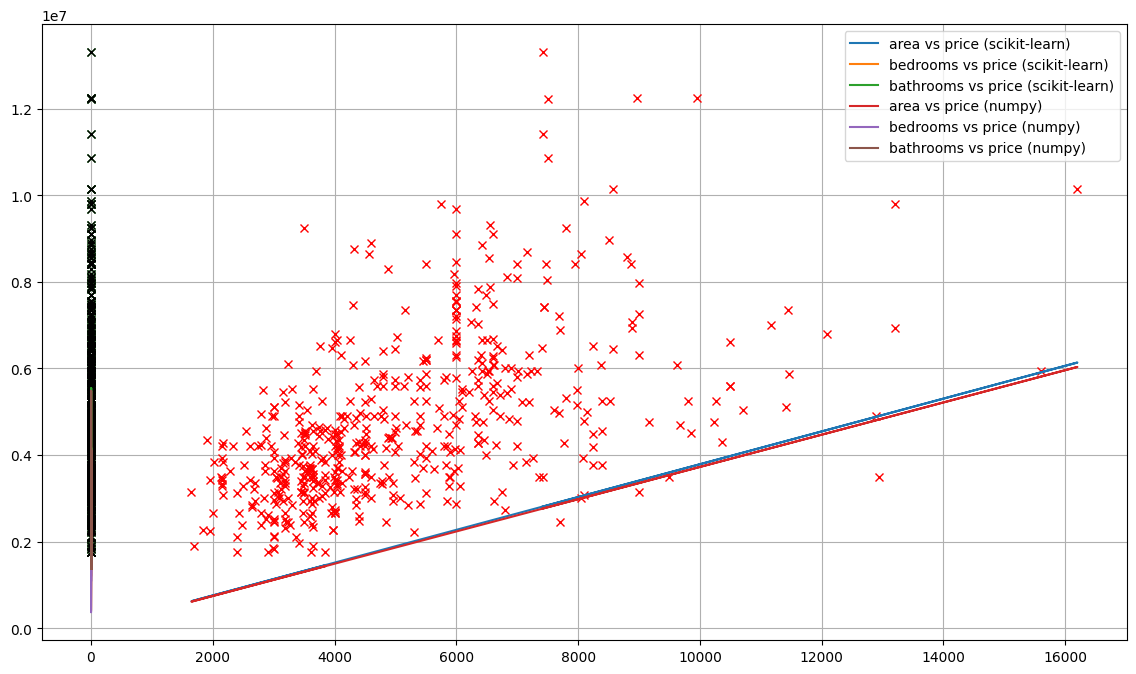

In [88]:
# порівняйте отримані результати

plt.figure(figsize = (14, 8))
plt.plot(df.area, df.price, "rx", color = "red")
plt.plot(df.area, hypothesis_function(regression.coef_[0],df.area), label = 'area vs price (scikit-learn)')
plt.plot(df.bedrooms, df.price, "rx" , color = "green")
plt.plot(df.bedrooms, hypothesis_function(regression.coef_[1],df.bedrooms), label = 'bedrooms vs price (scikit-learn)')
plt.plot(df.bedrooms, df.price, "rx" , color = "black")
plt.plot(df.bedrooms, hypothesis_function(regression.coef_[2],df.bathrooms), label = 'bathrooms vs price (scikit-learn)')
plt.plot(df.area, hypothesis_function(weight[0],df.area), label = 'area vs price (numpy)')
plt.plot(df.bedrooms, hypothesis_function(weight[1],df.bedrooms), label = 'bedrooms vs price (numpy)')
plt.plot(df.bedrooms, hypothesis_function(weight[2],df.bathrooms), label = 'bathrooms vs price (numpy)')

plt.grid()
plt.legend()
plt.show()